# Approximate some analytical functions by using the Gaussian process

In this notebook, we take a note to demonstrate how we can adopt the Gassian process to approximate some analytical examples, possibly with a local feature.

Firstly we include some numerical libraries as well as the Gaussian process regression class imported from sklearn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
# Use TeX font
rc('font', **{'family': 'sans-serif', 'serif': ['Helvetica']})
rc('text', usetex=True)
plt.rcParams["font.size"] = 15

np.random.seed(1)  # Fix the seed to get the same result

%matplotlib inline

## $f(x) = \left| 0.25 - x_{1}^{2} - x_{2}^{2}\right|$
The fist analytical example that we address here is the following function:

\begin{align}
    f(x) = \left| 0.25 - x_{1}^{2} - x_{2}^{2}\right|
\end{align}

Clearly the above function has a kink, and it imposes numerical challenges for the global grid-based approximation method such as the Chebyshev polynomial with any degrees.

First we scatter plot the above function in the domain of $[0, 1] \times [0, 1]$:

In [2]:
def f(x):
    """ The function to be predicted """
    return np.abs(0.25 - x[:, 0]**2 - x[:, 1]**2)


num_test = 1000
num_input = 2
X_test_f = np.random.uniform(0., 1., (num_test, num_input))
y_true_f = f(X_test_f)

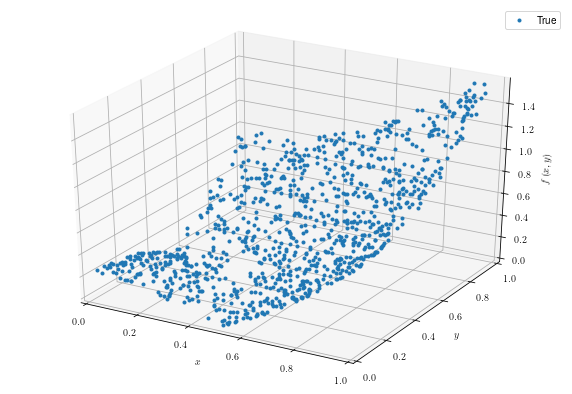

In [3]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': '3d'})
ax.plot(X_test_f[:, 0], X_test_f[:, 1], y_true_f.ravel(), 'o', markersize=3,
        label=r'True')
ax.set_xlabel(r"$x$")
ax.set_xlim([0., 1.])
ax.set_ylabel(r"$y$")
ax.set_ylim([0., 1.])
ax.set_zlabel(r"$f\left(x, y\right)$")
ax.set_zlim([0, None])
ax.legend(loc='best')
plt.show()

We define the mean squared error (: MSE hereafter) to quantify the approximation quality by the Gaussian process: 

In [4]:
def compute_mse(y_true, y_pred):
    """ Compute the mean squared error"""
    return 1 / len(y_true) * np.sum(np.square(y_true - y_pred.ravel()))

Next we define the following function where we define:  
(1) Instantiate the Gaussian process model;  
(2) Fit the model with the given number of training datasets;  
(3) Make the prediction for the given number of test points (num_trainings); and  
(4) Compute MSE

In [5]:
def return_mse(
    analyticFunc, X_test, y_true, num_trainings, num_input, alpha=1e-8):
    mse_err = []  # Track the MSE error
    for num in num_trainings:
        # Generate training data
        X_train = np.random.uniform(-1., 1., (num, num_input))
        y_train = analyticFunc(X_train).reshape(num, 1)
        # Instantiate the Gaussian Process model
        kernel = RBF() \
        + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 10))
        # kernel = C() * RBF(1, (1e-5, 1e5))
        gp = GaussianProcessRegressor(
            kernel=kernel, alpha=alpha, n_restarts_optimizer=10,
            normalize_y=False)
        # Fit to data using Maximum Likelihood Estimation of the parameters
        gp.fit(X_train, y_train)
        # Make the prediction
        y_pred, sigma = gp.predict(X_test, return_std=True)
        # Track the error
        mse_err.append(compute_mse(y_true, y_pred))

    return mse_err

We define the number of training datasets, the compute the MSE with respect to the number of training examples:

In [6]:
num_trainings_f = [10, 55, 100, 550, 1000]
mse_err_f = return_mse(f, X_test_f, y_true_f, num_trainings_f, num_input)

Finally plot MSE of this analytical example:

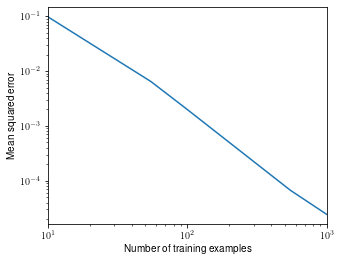

In [7]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(num_trainings_f, mse_err_f)
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Mean squared error')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([np.min(num_trainings_f), np.max(num_trainings_f)])
plt.show()

## $g(x) = \exp{}\left(0.3 x_{1} + 0.7 x_{2}\right)$

The next function we address is the 2-dimensional exponential function. First we plot the function on the domain of $[-1, 1] \times [-1, 1]$:

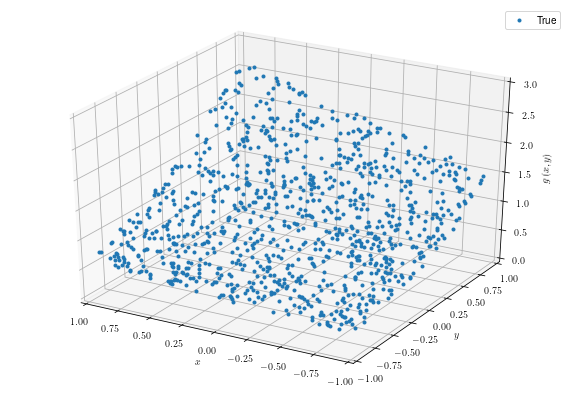

In [8]:
def g(x):
    """ The function to be predicted """
    return np.exp(0.3 * x[:, 0] + 0.7 * x[:, 1])


X_test_g = np.random.uniform([-1, -1], [1, 1], (num_test, num_input))
y_true_g = g(X_test_g)

# Plot
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': '3d'})
ax.plot(X_test_g[:, 0], X_test_g[:, 1], y_true_g.ravel(), 'o', markersize=3,
        label=r'True')
ax.set_xlabel(r"$x$")
ax.set_xlim([-1., 1.])
ax.set_ylabel(r"$y$")
ax.set_ylim([-1., 1.])
ax.invert_yaxis()
ax.set_zlabel(r"$g\left(x, y\right)$")
ax.set_zlim([0., 3.])
ax.legend(loc='best')
plt.show()

As seen above, the behavior of the function is smooth enough; thus, we conjecture that the amount of training examples to achieve the certain level of approximation quality should be smaller than the previous example that we address in the above section.

In [9]:
num_trainings_g = [4, 8, 16, 32, 64]
mse_err_g = return_mse(
    g, X_test_g, y_true_g, num_trainings_g, num_input, alpha=1e-8)

/Users/takafumi/.pyenv/versions/anaconda3-5.3.0/envs/adapt/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/takafumi/.pyenv/versions/anaconda3-5.3.0/envs/adapt/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


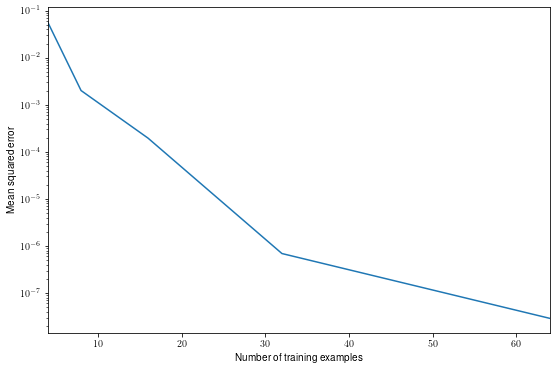

In [10]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(num_trainings_g, mse_err_g)
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Mean squared error')
ax.set_yscale('log')
ax.set_xlim([np.min(num_trainings_g), np.max(num_trainings_g)])
plt.show()